In [2]:
# library
import matplotlib.pyplot as plt
import datetime
import yfinance as yf


In [4]:
"""
Defining some constants for data mining
"""
NUM_DAYS = 10000     # The number of days of historical data to retrieve
INTERVAL = '1d'     # Sample rate of historical data
#symbol = 'AAPL'     # Symbol of the desired stock

# List of symbols for technical indicators
INDICATORS = ['RSI', 'MACD', 'STOCH','ADL', 'ATR', 'MOM', 'MFI', 'ROC', 'OBV', 'CCI', 'EMV', 'BASP', 'PIVOT_FIB', 'VORTEX']

"""
Pull the historical data using yfinance
Rename the column names because finta uses the lowercase names
"""

start = "2015-01-01"
end = datetime.datetime.today()
symbol = "tsla"
df = yf.download(symbol, start = start, end = end, interval = INTERVAL)

df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-06,1073.469971,1079.000000,1027.699951,1045.760010,1045.760010,29782800
2022-04-07,1052.390015,1076.589966,1021.539978,1057.260010,1057.260010,26482400
2022-04-08,1043.209961,1048.439941,1022.440002,1025.489990,1025.489990,18293300
2022-04-11,980.400024,1008.469971,974.640015,975.929993,975.929993,19785700
2022-04-12,997.640015,1021.190002,976.599976,986.950012,986.950012,21948800


Text(0.5, 1.0, 'tsla')

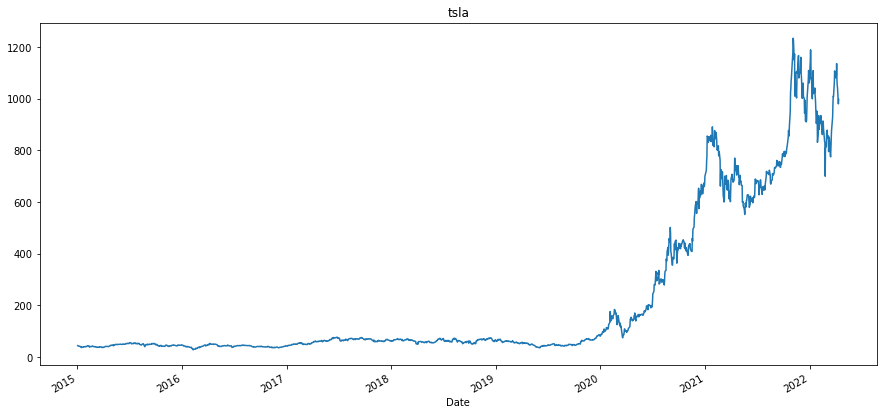

In [5]:

df['Open'].plot(label = symbol , figsize = (15,7))
plt.title(symbol)


<AxesSubplot:xlabel='Date'>

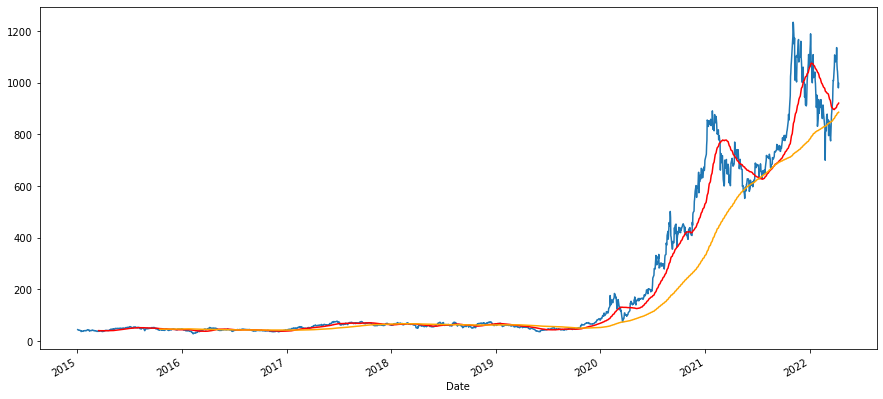

In [6]:
# moving average 50, 200

df['MA50'] = df['Open'].rolling(50).mean()
df['MA200'] = df['Open'].rolling(200).mean()
df['Open'].plot(figsize = (15,7), label="price")
df['MA50'].plot(label="MA50", color ="red")
df['MA200'].plot(label="MA200", color = "orange")

In [7]:
df

,Open,High,Low,Close,Adj Close,Volume,MA50,MA200
Date,,,,,,,,
2015-01-02,44.574001,44.650002,42.652000,43.862000,43.862000,23822000,NaN,NaN
2015-01-05,42.910000,43.299999,41.431999,42.018002,42.018002,26842500,NaN,NaN
2015-01-06,42.012001,42.840000,40.841999,42.256001,42.256001,31309500,NaN,NaN
2015-01-07,42.669998,42.956001,41.956001,42.189999,42.189999,14842000,NaN,NaN
2015-01-08,42.562000,42.759998,42.001999,42.124001,42.124001,17212500,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-04-06,1073.469971,1079.000000,1027.699951,1045.760010,1045.760010,29782800,911.676799,879.129501
2022-04-07,1052.390015,1076.589966,1021.539978,1057.260010,1057.260010,26482400,913.676000,881.231451
2022-04-08,1043.209961,1048.439941,1022.440002,1025.489990,1025.489990,18293300,915.872999,883.072551


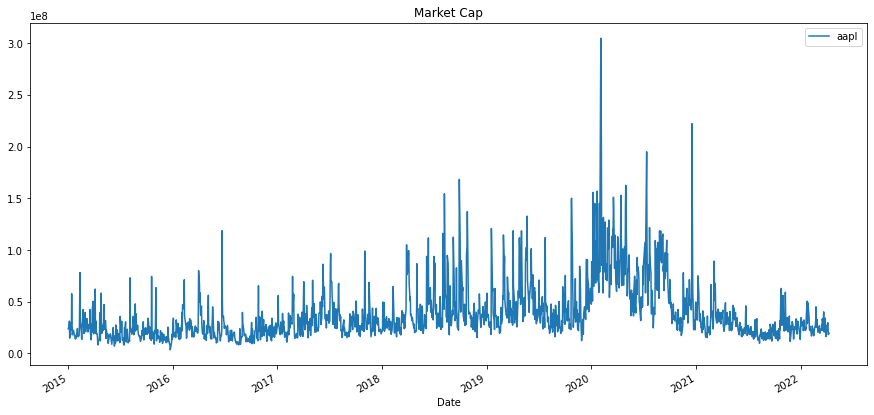

In [18]:
# volume
df['Volume'].plot(label = symbol, figsize = (15,7))
df['MarktCap'] = df['Open'] * df['Volume']
plt.title('Market Cap')
plt.legend()

<function matplotlib.pyplot.legend(*args, **kwargs)>

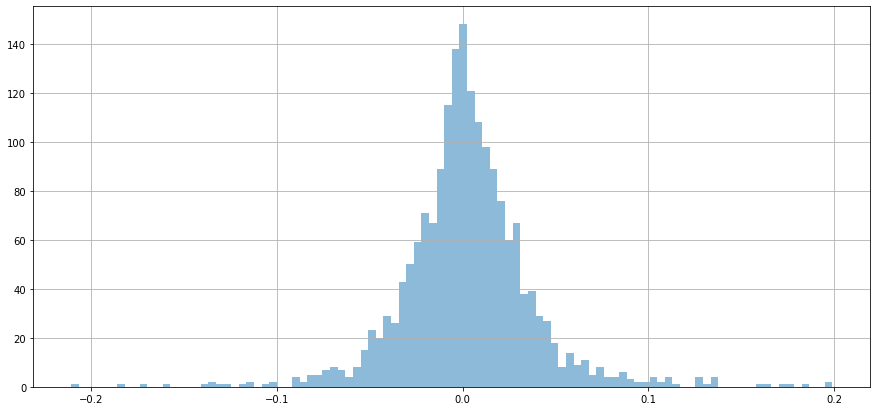

In [19]:
# volatility

df['returns'] = (df['Close']/df['Close'].shift(1)) -1
df['returns'].hist(bins = 100, label = symbol, alpha = 0.5, figsize = (15,7))
plt.legend